# COVID-19 ANALYSIS

In [1]:
import pandas as pd
from utils import *
df = pd.read_csv("COVID19_data.csv", index_col="ID")
df.describe()

,AGE,DAYS_HOSPITAL,DAYS_ICU,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,2050.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,20.456931,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


In [110]:
print(df.isna().any())

AGE                 True
SEX                 True
DAYS_HOSPITAL      False
DAYS_ICU           False
EXITUS              True
DESTINATION         True
TEMP               False
HEART_RATE         False
GLUCOSE            False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool


In [49]:
CAT_VARS = get_categorical_variables(df)
NUM_VARS = get_numerical_variables(df)
print(CAT_VARS)
print(NUM_VARS)

['SEX', 'EXITUS', 'DESTINATION']
['AGE', 'DAYS_HOSPITAL', 'DAYS_ICU', 'TEMP', 'HEART_RATE', 'GLUCOSE', 'SAT_O2', 'BLOOD_PRES_SYS', 'BLOOD_PRES_DIAS']


### Missing values in categorical variables

In [50]:
from collections import Counter

for var in CAT_VARS:
  print(var, Counter(df[var]))

SEX Counter({'MALE': 1227, 'FEMALE': 825, nan: 2})
EXITUS Counter({'NO': 1684, 'YES': 329, nan: 41})
DESTINATION Counter({nan: 1383, 'ADMISSION': 671})


### Zero values in numerical variables

In [51]:
for var in NUM_VARS:
  print(var, Counter(df[var])[0])

AGE 0
DAYS_HOSPITAL 21
DAYS_ICU 1947
TEMP 467
HEART_RATE 448
GLUCOSE 2035
SAT_O2 422
BLOOD_PRES_SYS 750
BLOOD_PRES_DIAS 750


### Relevant variables

In [52]:
# No values
df.pop("GLUCOSE")
df.pop("DESTINATION")

# Values to predict
days_hosp = df.pop("DAYS_HOSPITAL")
days_icu = df.pop("DAYS_ICU")
exitus_col = df.pop("EXITUS")

print(exitus_col)

ID
1       NO
2       NO
3       NO
4       NO
5       NO
        ..
2050    NO
2051    NO
2052    NO
2053    NO
2054    NO
Name: EXITUS, Length: 2054, dtype: object


In [53]:
print(df.isnull().any())

AGE                 True
SEX                 True
TEMP               False
HEART_RATE         False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool


## Categorical Variables

In [54]:
cat_cols = get_categorical_variables(df)
print(cat_cols)

['SEX']


In [55]:
# Divide in categorical and numeric columns
df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis=1)

In [56]:
def imput_categorical(cat_var, imputer):
  return pd.DataFrame(
    imputer.fit_transform(cat_var),
    columns=cat_var.columns,
    index=cat_var.index
  )

In [57]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent')
df_cat = imput_categorical(df_cat, imp_cat)
df_exitus = imput_categorical(pd.DataFrame(exitus_col), imp_cat)

print(df_cat)
print(df_cat.isnull().any())

print(df_exitus)
print(df_exitus.isna().any())

         SEX
ID          
1     FEMALE
2     FEMALE
3       MALE
4       MALE
5       MALE
...      ...
2050  FEMALE
2051  FEMALE
2052  FEMALE
2053    MALE
2054    MALE

[2054 rows x 1 columns]
SEX    False
dtype: bool
     EXITUS
ID         
1        NO
2        NO
3        NO
4        NO
5        NO
...     ...
2050     NO
2051     NO
2052     NO
2053     NO
2054     NO

[2054 rows x 1 columns]
EXITUS    False
dtype: bool


In [94]:
def categorical_to_numeric(cat_var, encoder):
  return pd.DataFrame(
    encoder.fit_transform(cat_var),
    columns=cat_var.columns,
    index=cat_var.index
  )

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cat = categorical_to_numeric(df_cat, le)
df_exitus = categorical_to_numeric(df_exitus, le)
print(df_exitus)

      EXITUS
ID          
1          0
2          0
3          0
4          0
5          0
...      ...
2050       0
2051       0
2052       0
2053       0
2054       0

[2054 rows x 1 columns]


/home/fompe/miniconda3/envs/env_PY/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Numerical Variables

In [60]:
df_num.isna().any()

AGE                 True
TEMP               False
HEART_RATE         False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool

In [61]:
df_num['AGE'].fillna(0.0, inplace=True)
df_num.isna().any()

AGE                False
TEMP               False
HEART_RATE         False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool

In [62]:
df_num.describe()

,AGE,TEMP,HEART_RATE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,70.718598,28.386319,70.787731,73.397760,83.571568,48.328140
std,20.674469,15.419158,41.802038,37.863716,67.450853,44.225438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,35.400000,63.000000,81.000000,0.000000,0.000000
50%,68.000000,36.400000,84.000000,93.000000,115.000000,64.000000
75%,98.000000,36.900000,98.000000,96.000000,137.000000,79.000000
max,189.000000,40.100000,593.000000,99.000000,772.000000,845.000000


In [63]:
metrics_limits = {
  'TEMP': (33,42),
  'AGE': (1,120),
  'HEART_RATE': (40, 200),
  'SAT_O2': (40, 100),
  'BLOOD_PRES_SYS': (10, 200),
  'BLOOD_PRES_DIAS': (10, 130)
}

#### Remove outlier values

In [65]:
for metric in metrics_limits:
  min_value, max_value = metrics_limits[metric]
  mask = ~in_range(df_num[metric], min_value, max_value)
  print(metric, mask.sum() - (df_num[metric ]== 0.0).sum())
  df_num.loc[mask, metric] = 0.0

df_num.describe()

4
AGE 1
448
HEART_RATE 2
422
SAT_O2 1
750
BLOOD_PRES_SYS 1
750
BLOOD_PRES_DIAS 2


,AGE,TEMP,HEART_RATE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,70.626582,28.386319,70.488802,73.392892,83.195716,47.555988
std,20.568096,15.419158,40.226388,37.872514,65.742139,37.612679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,35.400000,62.250000,81.000000,0.000000,0.000000
50%,68.000000,36.400000,84.000000,93.000000,115.000000,64.000000
75%,98.000000,36.900000,98.000000,96.000000,137.000000,79.000000
max,106.000000,40.100000,190.000000,99.000000,200.000000,127.000000


In [66]:
imp_num = SimpleImputer(missing_values=0.0, strategy='mean')
df_num = pd.DataFrame(
  imp_num.fit_transform(df_num),
  columns=df_num.columns,
  index=df_num.index
)
print(df_num.isnull().any())
print(df_num.describe())

AGE                False
TEMP               False
HEART_RATE         False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool
               AGE         TEMP   HEART_RATE       SAT_O2  BLOOD_PRES_SYS  \
count  2054.000000  2054.000000  2054.000000  2054.000000     2054.000000   
mean     70.798926    36.739445    90.264339    92.427345      131.146585   
std      20.269893     0.721404    14.950901     6.054193       18.187327   
min      15.000000    33.200000    41.000000    40.000000       10.000000   
25%      57.000000    36.300000    82.000000    92.000000      125.000000   
50%      68.000000    36.739445    90.264339    93.000000      131.146585   
75%      98.000000    36.900000    98.000000    96.000000      137.000000   
max     106.000000    40.100000   190.000000    99.000000      200.000000   

       BLOOD_PRES_DIAS  
count      2054.000000  
mean         75.023041  
std          10.385303  
min          11.000000  
25%          72.000

## Merge all the processed variables

In [105]:
df_processed = pd.merge(
  left=df_cat,
  right=df_num,
  on='ID'
)

print(df_processed)

      SEX        AGE       TEMP  HEART_RATE     SAT_O2  BLOOD_PRES_SYS  \
ID                                                                       
1       0  15.000000  37.000000   90.264339  92.000000      131.146585   
2       0  18.000000  37.300000  105.000000  97.000000      131.146585   
3       1  21.000000  38.500000  112.000000  95.000000       85.000000   
4       1  21.000000  39.200000  113.000000  97.000000      131.146585   
5       1  22.000000  36.300000   80.000000  92.000000      111.000000   
...   ...        ...        ...         ...        ...             ...   
2050    0  70.798926  36.739445   90.264339  92.427345      131.146585   
2051    0  70.798926  36.500000   90.264339  92.427345      131.146585   
2052    0  70.798926  36.800000  190.000000  98.000000      131.146585   
2053    1  70.798926  36.739445  120.000000  93.000000      131.146585   
2054    1  70.798926  36.800000   90.264339  92.427345      131.146585   

      BLOOD_PRES_DIAS  
ID           

In [68]:
df_processed.describe()

,SEX_FEMALE,SEX_MALE,AGE,TEMP,HEART_RATE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.401655,0.598345,70.798926,36.739445,90.264339,92.427345,131.146585,75.023041
std,0.490352,0.490352,20.269893,0.721404,14.950901,6.054193,18.187327,10.385303
min,0.000000,0.000000,15.000000,33.200000,41.000000,40.000000,10.000000,11.000000
25%,0.000000,0.000000,57.000000,36.300000,82.000000,92.000000,125.000000,72.000000
50%,0.000000,1.000000,68.000000,36.739445,90.264339,93.000000,131.146585,75.023041
75%,1.000000,1.000000,98.000000,36.900000,98.000000,96.000000,137.000000,79.000000
max,1.000000,1.000000,106.000000,40.100000,190.000000,99.000000,200.000000,127.000000


## Feature Selection

In [104]:
from sklearn.feature_selection import SelectKBest, chi2

fs_k_best_chi2 = SelectKBest(chi2, k=5)
fs_k_best_chi2.fit(df_processed, df_exitus)
col_filter = fs_k_best_chi2.get_support()
df_k_best_chi2 = df_processed.iloc[:, col_filter]

print(df_k_best_chi2)

      SEX_FEMALE        AGE     SAT_O2  BLOOD_PRES_SYS  BLOOD_PRES_DIAS
ID                                                                     
1            1.0  15.000000  92.000000      131.146585        75.023041
2            1.0  18.000000  97.000000      131.146585        75.023041
3            0.0  21.000000  95.000000       85.000000        47.000000
4            0.0  21.000000  97.000000      131.146585        75.023041
5            0.0  22.000000  92.000000      111.000000        70.000000
...          ...        ...        ...             ...              ...
2050         1.0  70.798926  92.427345      131.146585        75.023041
2051         1.0  70.798926  92.427345      131.146585        75.023041
2052         1.0  70.798926  98.000000      131.146585        75.023041
2053         0.0  70.798926  93.000000      131.146585        75.023041
2054         0.0  70.798926  92.427345      131.146585        75.023041

[2054 rows x 5 columns]


In [70]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

fs_perc_mi = SelectPercentile(mutual_info_classif, percentile=40)
fs_perc_mi.fit(df_processed, df_exitus['EXITUS'])
col_filter = fs_perc_mi.get_support()
df_perc_mi = df_processed.iloc[:, col_filter]

print(df_perc_mi)

            AGE       TEMP     SAT_O2
ID                                   
1     15.000000  37.000000  92.000000
2     18.000000  37.300000  97.000000
3     21.000000  38.500000  95.000000
4     21.000000  39.200000  97.000000
5     22.000000  36.300000  92.000000
...         ...        ...        ...
2050  70.798926  36.739445  92.427345
2051  70.798926  36.500000  92.427345
2052  70.798926  36.800000  98.000000
2053  70.798926  36.739445  93.000000
2054  70.798926  36.800000  92.427345

[2054 rows x 3 columns]


### Feature Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
# df_num_mms = mms.fit_transform(df_k_best_chi2)
df_num_mms = mms.fit_transform(df_processed)
print(df_num_mms.shape)
print(df_num_mms)

(2054, 8)
[[1.         0.         0.         ... 0.88135593 0.6376136  0.55192277]
 [1.         0.         0.03296703 ... 0.96610169 0.6376136  0.55192277]
 [0.         1.         0.06593407 ... 0.93220339 0.39473684 0.31034483]
 ...
 [1.         0.         0.61317501 ... 0.98305085 0.6376136  0.55192277]
 [0.         1.         0.61317501 ... 0.89830508 0.6376136  0.55192277]
 [0.         1.         0.61317501 ... 0.88859907 0.6376136  0.55192277]]


## DATA EXPLORATION

In [72]:
df_grouped_sex = df_processed.drop('SEX_FEMALE', axis=1).groupby(['SEX_MALE'])
print(df_grouped_sex.mean())


                AGE       TEMP  HEART_RATE     SAT_O2  BLOOD_PRES_SYS  \
SEX_MALE                                                                
0.0       73.692602  36.647266   90.400523  92.839916      130.176762   
1.0       68.856467  36.801323   90.172922  92.150396      131.797605   

          BLOOD_PRES_DIAS  
SEX_MALE                   
0.0             73.735651  
1.0             75.887237  


## DATA VISUALIZATION

In [73]:
import matplotlib.pyplot as plt

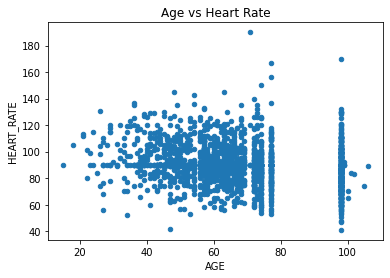

In [74]:
df_processed.plot(kind='scatter', x='AGE', y='HEART_RATE', title='Age vs Heart Rate')
plt.show()

In [75]:
df_processed.filter(['AGE', 'HEART_RATE']).corr()

,AGE,HEART_RATE
AGE,1.000000,-0.221838
HEART_RATE,-0.221838,1.000000


No correlation between age and heart rate

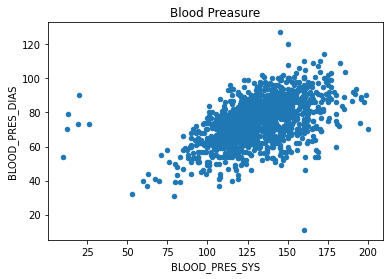

In [76]:
df_processed.plot(kind='scatter', x='BLOOD_PRES_SYS', y='BLOOD_PRES_DIAS', title='Blood Preasure')
plt.show()

In [77]:
df_processed.filter(['BLOOD_PRES_SYS', 'BLOOD_PRES_DIAS']).corr()

,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
BLOOD_PRES_SYS,1.00000,0.49544
BLOOD_PRES_DIAS,0.49544,1.00000


In [81]:
import kaplanmeier as km

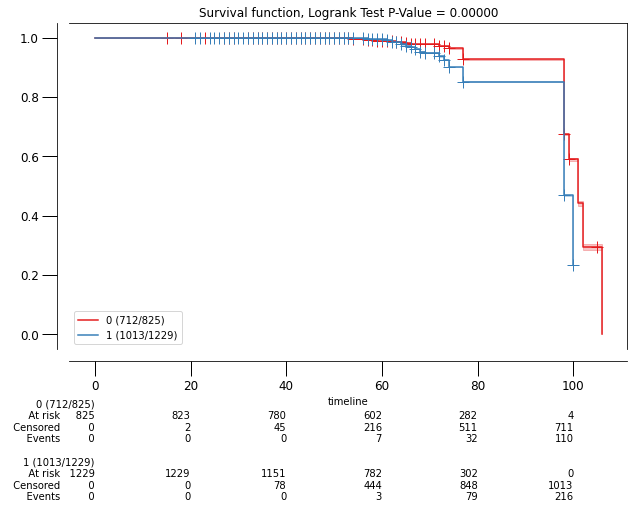

In [102]:
out = km.fit(df_num['AGE'], df_exitus['EXITUS'], df_cat['SEX'])
km.plot(out)

## MODELING

In [78]:
df_exitus['EXITUS'].apply(lambda x: 0 if x == 'NO' else 1)

ID
1       0
2       0
3       0
4       0
5       0
       ..
2050    0
2051    0
2052    0
2053    0
2054    0
Name: EXITUS, Length: 2054, dtype: int64

In [103]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(df_num_mms, df_exitus['EXITUS'])

SVC(kernel='linear')

In [80]:
from sklearn.model_selection import train_test_split

x = []
y = []
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=df['cat'])

KeyError: 'cat'

In [ ]:
svc_model.predict([[22,1,0,36.3,80,92,111,70]])

array([0])